In [60]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 차트 내 한글 및 마이너스 기호 표시를 위한 import
from matplotlib import rc
import matplotlib.font_manager as fm

import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [67]:
df = pd.read_csv('./통합데이터_추가수정(사업체수 추가).csv',encoding='cp949')
df.head()

,역사명,역위도,역경도,일평균승하차(명),상가 면적,거주자수,남여비율,1인 가구수 레벨,1인 가구수(세대),사업체수,20~40대 인구 수 레벨,고속버스 터미널,기차역,여객 터미널,주변 관광지,주변 대학교,일평균(원)
0,가야역,35.155883,129.042817,5799,11.0,25217,0.95,83,6291,49,57,NaN,1.0,NaN,0,0,1926082
1,감전역,35.155528,128.991146,6107,10.0,12825,1.12,56,5461,57,31,NaN,NaN,NaN,0,0,2535118
2,강서구청,35.211247,128.981756,4251,NaN,2076,1.22,26,4630,109,4,NaN,NaN,NaN,0,0,2029127
3,개금역,35.153284,129.020533,13621,37.0,27187,0.94,79,2501,36,65,NaN,NaN,NaN,0,1,4717075
4,거제(법원·검찰청),35.188589,129.073941,9546,16.0,27403,0.91,14,3093,114,13,NaN,NaN,NaN,0,1,3099526


In [68]:
df.columns

Index(['역사명', '역위도', '역경도', '일평균승하차(명)', '상가 면적', '거주자수', '남여비율', '1인 가구수 레벨',
       '1인 가구수(세대)', '사업체수', '20~40대 인구 수 레벨', '고속버스 터미널', '기차역', '여객 터미널',
       '주변 관광지', '주변 대학교', '일평균(원)'],
      dtype='object')

In [69]:
use_df = df[['역사명','일평균승하차(명)', '남여비율', '1인 가구수(세대)','사업체수','일평균(원)']]
use_df.head()

,역사명,일평균승하차(명),남여비율,1인 가구수(세대),사업체수,일평균(원)
0,가야역,5799,0.95,6291,49,1926082
1,감전역,6107,1.12,5461,57,2535118
2,강서구청,4251,1.22,4630,109,2029127
3,개금역,13621,0.94,2501,36,4717075
4,거제(법원·검찰청),9546,0.91,3093,114,3099526


In [96]:
# 변수 4
clustering_data = use_df[['일평균승하차(명)', '사업체수', '1인 가구수(세대)','일평균(원)']].fillna(0).to_numpy()

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(clustering_data)

clustering_data = minmax_scaler.transform(clustering_data)

In [38]:
# 변수 2개
clustering_data = use_df[['일평균승하차(명)','1인 가구수(세대)']].fillna(0).to_numpy()

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(clustering_data)

clustering_data = minmax_scaler.transform(clustering_data)

In [110]:
# 변수 3개
clustering_data = use_df[['일평균승하차(명)','1인 가구수(세대)','일평균(원)']].fillna(0).to_numpy()

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(clustering_data)

clustering_data = minmax_scaler.transform(clustering_data)

In [97]:
clustering_data.shape

(100, 4)

In [111]:
minmax_scaler.transform([[2,2,2]])

array([[-0.00598469, -0.05325914, -0.00220548]])

In [112]:
scaling_data = pd.DataFrame(clustering_data,columns=['일평균승하차(명)', '사업체수', '1인 가구수(세대)','일평균(원)'],index=list(use_df.역사명))
scaling_data.head()

,일평균승하차(명),1인 가구수(세대),일평균(원)
가야역,0.094868,0.779942,0.046801
감전역,0.100226,0.669979,0.062298
강서구청,0.067937,0.559883,0.049423
개금역,0.230950,0.277822,0.117815
거제(법원·검찰청),0.160056,0.356253,0.076658


In [39]:
# 변수 2개
scaling_data = pd.DataFrame(clustering_data,columns=['일평균승하차(명)','1인 가구수(세대)'],index=list(use_df.역사명))
scaling_data.head()

,일평균승하차(명),1인 가구수(세대)
가야역,0.094868,0.779942
감전역,0.100226,0.669979
강서구청,0.067937,0.559883
개금역,0.230950,0.277822
거제(법원·검찰청),0.160056,0.356253


In [113]:
# 3개
scaling_data = pd.DataFrame(clustering_data,columns=['일평균승하차(명)','1인 가구수(세대)','일평균(원)'],index=list(use_df.역사명))
scaling_data.head()

,일평균승하차(명),1인 가구수(세대),일평균(원)
가야역,0.094868,0.779942,0.046801
감전역,0.100226,0.669979,0.062298
강서구청,0.067937,0.559883,0.049423
개금역,0.230950,0.277822,0.117815
거제(법원·검찰청),0.160056,0.356253,0.076658


In [114]:
scaling_data.corr()

,일평균승하차(명),1인 가구수(세대),일평균(원)
일평균승하차(명),1.000000,0.033473,0.919696
1인 가구수(세대),0.033473,1.000000,0.036853
일평균(원),0.919696,0.036853,1.000000


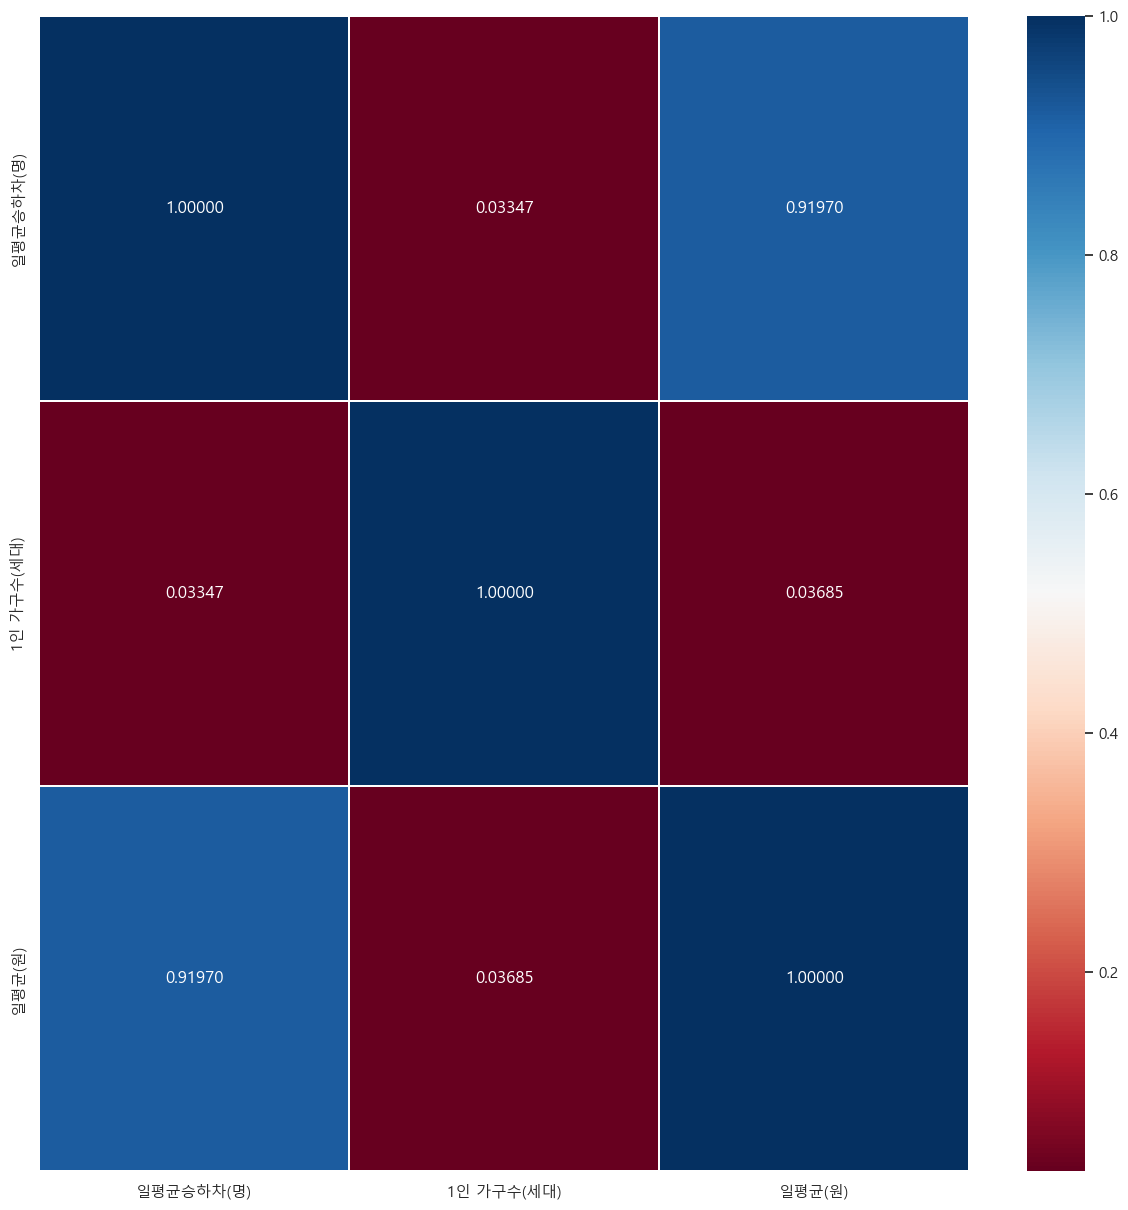

In [115]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(scaling_data.corr(), annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

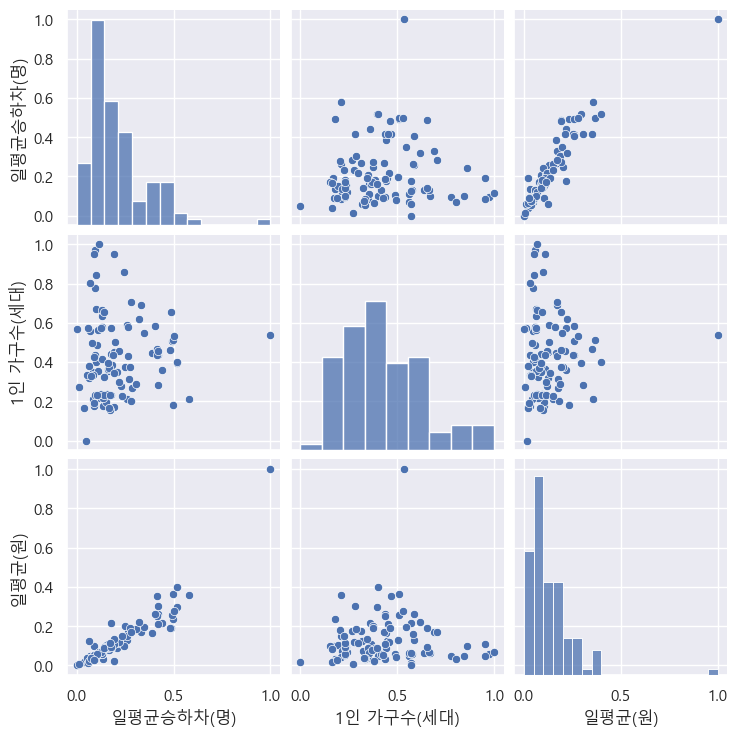

In [116]:
sns.pairplot(scaling_data)
plt.show()

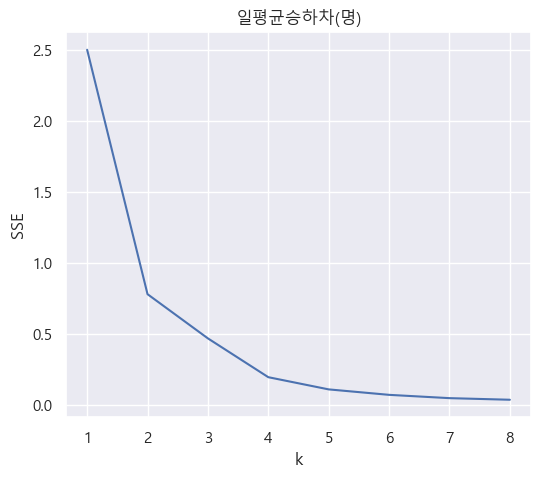

In [78]:
# 일평균승하차(명)
df_oneman = pd.DataFrame(scaling_data['일평균승하차(명)'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_oneman)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('일평균승하차(명)')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [79]:
# 남여비율
df_oneman = pd.DataFrame(scaling_data['남여비율'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_oneman)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('남여비율')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

KeyError: '남여비율'

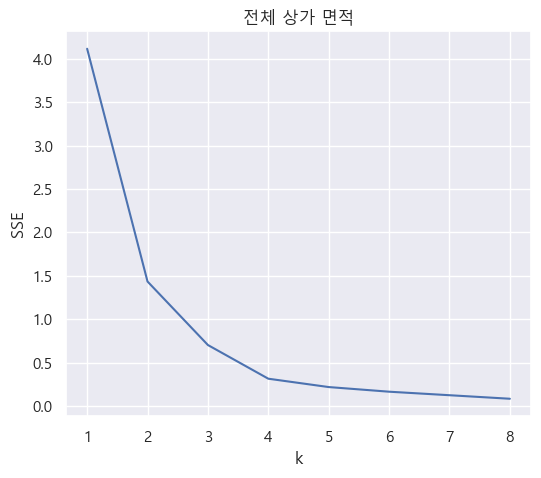

In [80]:
# 전체 상가 면적
df_oneman = pd.DataFrame(scaling_data['1인 가구수(세대)'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_oneman)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('전체 상가 면적')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [119]:
scaling_data

,일평균승하차(명),1인 가구수(세대),일평균(원)
가야역,0.094868,0.779942,0.046801
감전역,0.100226,0.669979,0.062298
강서구청,0.067937,0.559883,0.049423
개금역,0.230950,0.277822,0.117815
거제(법원·검찰청),0.160056,0.356253,0.076658
...,...,...,...
충렬사(안락),0.087891,0.191706,0.026219
토성,0.234864,0.226020,0.150515
하단,0.499896,0.531267,0.277933
해운대역,0.320946,0.618839,0.222429


In [120]:
# 적절한 군집수 3을 가지고 군집 예측값 생성

cluster_model = KMeans(n_clusters=2,        # =k
                       n_init=3,           # centroid를 몇번 샘플링한건지, 많이 돌릴수록 안정화된 결과가 나옴
                       max_iter=500,        # K-Means를 몇번 반복 수행할건지
                       )

cluster_model.fit(scaling_data)

centers = cluster_model.cluster_centers_    # 각 군집의 중심점
pred = cluster_model.predict(scaling_data)     # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

          0         1         2
0  0.288421  0.611045  0.178351
1  0.165631  0.301285  0.095791
[0 0 0 1 1 0 1 0 0 1]


In [121]:
# 클러스터링 결과에 따른 각 데이터별 군집 번호를 데이터프레임에 추가
cluster_df = scaling_data.copy()
cluster_df['clust'] = pred
cluster_df

,일평균승하차(명),1인 가구수(세대),일평균(원),clust
가야역,0.094868,0.779942,0.046801,0
감전역,0.100226,0.669979,0.062298,0
강서구청,0.067937,0.559883,0.049423,0
개금역,0.230950,0.277822,0.117815,1
거제(법원·검찰청),0.160056,0.356253,0.076658,1
...,...,...,...,...
충렬사(안락),0.087891,0.191706,0.026219,1
토성,0.234864,0.226020,0.150515,1
하단,0.499896,0.531267,0.277933,0
해운대역,0.320946,0.618839,0.222429,0


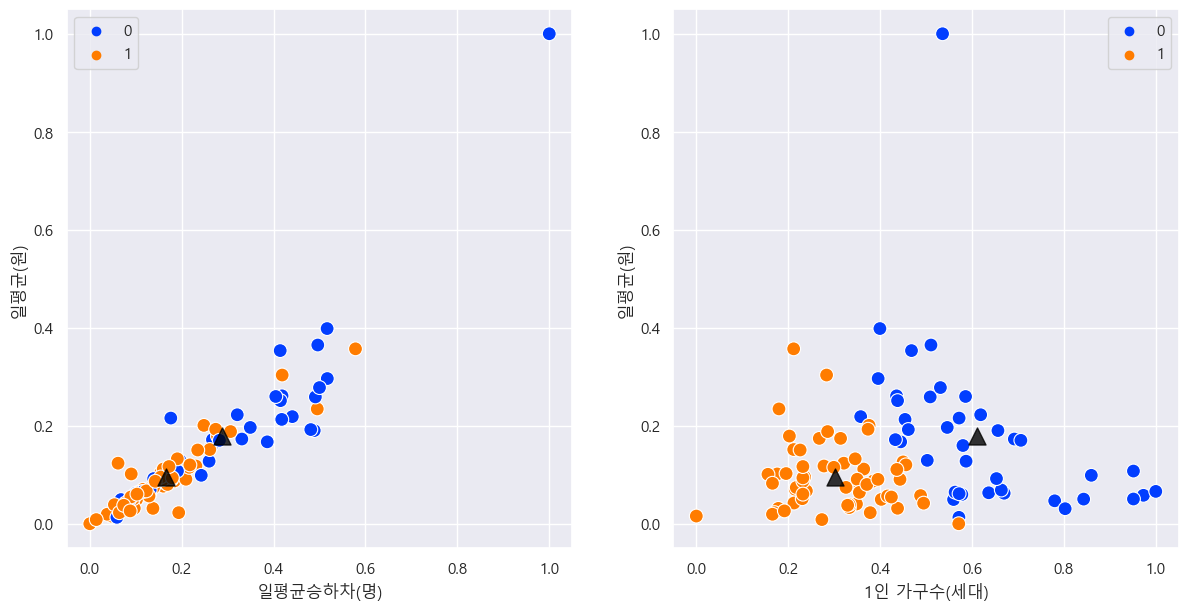

In [122]:
plt.figure(figsize=(30,7))
X= cluster_df
plt.subplot(141)    
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(142)    
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,2], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')

plt.show()

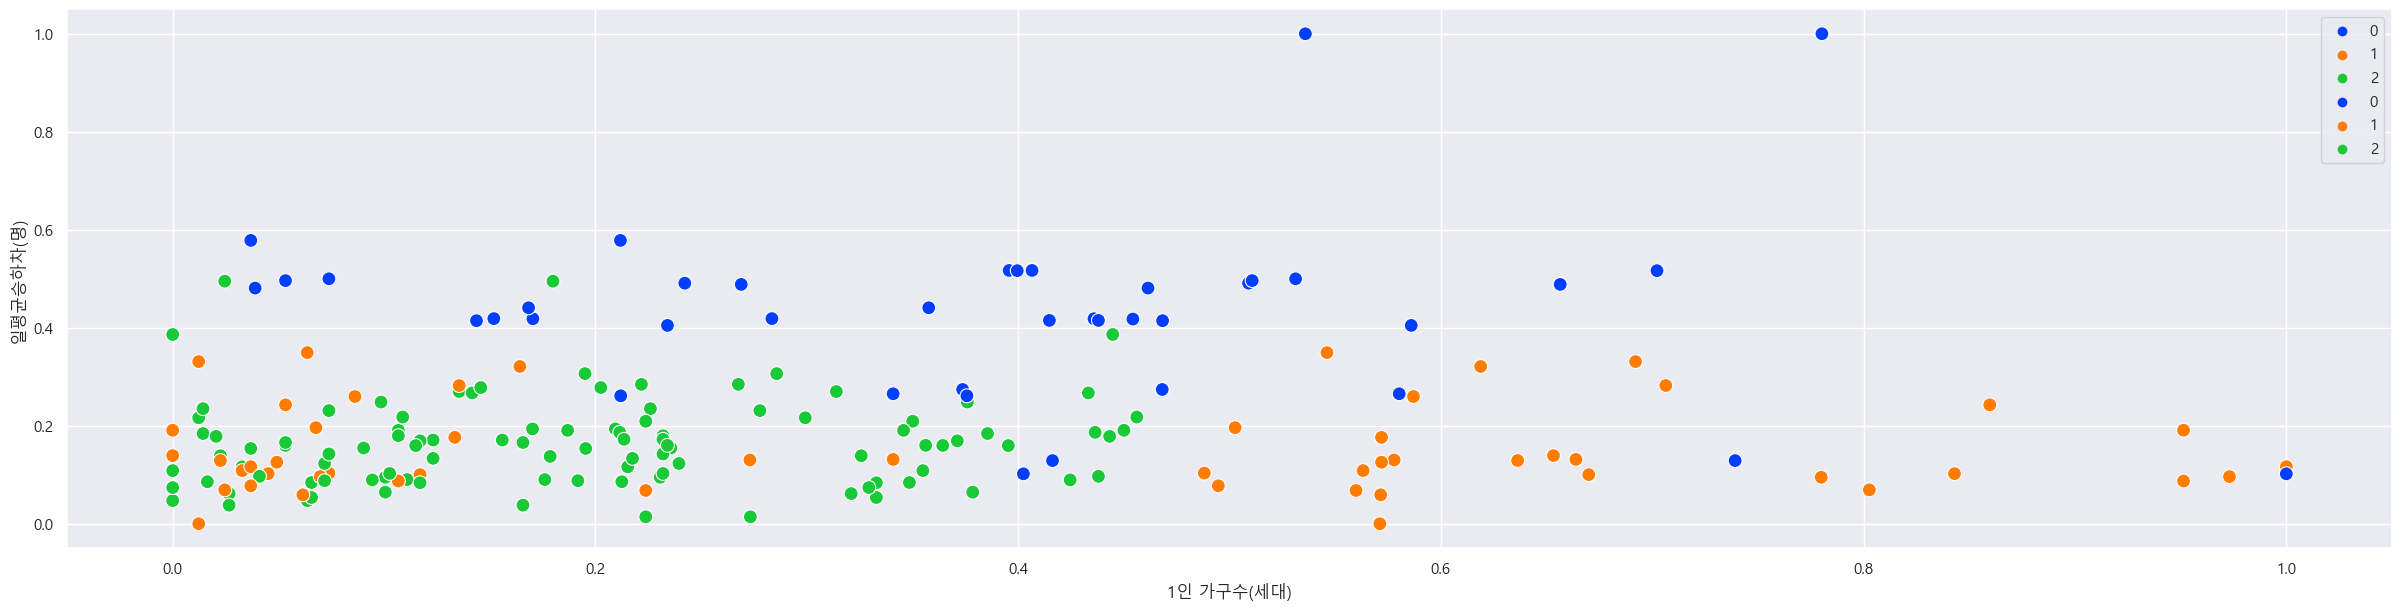

In [90]:
plt.figure(figsize=(30,7))
X= cluster_df

sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,0], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,0], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')

plt.show()

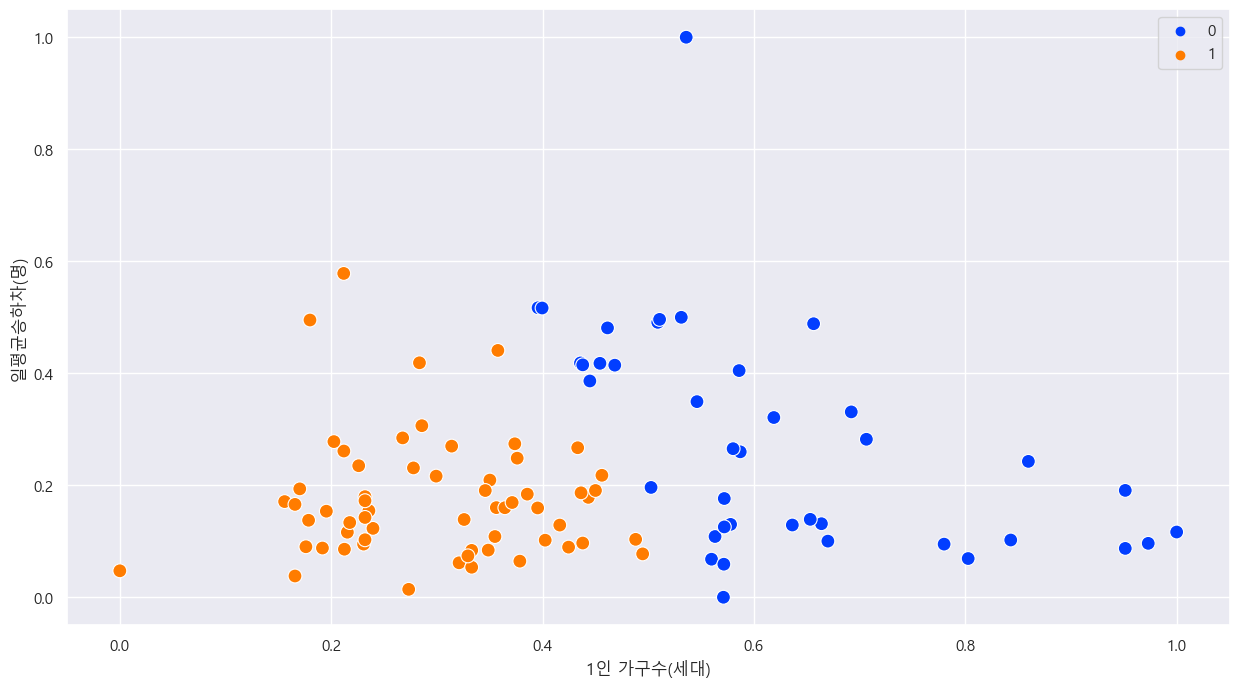

In [56]:
plt.figure(figsize=(15,8))
X= cluster_df
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,0], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')
plt.show()

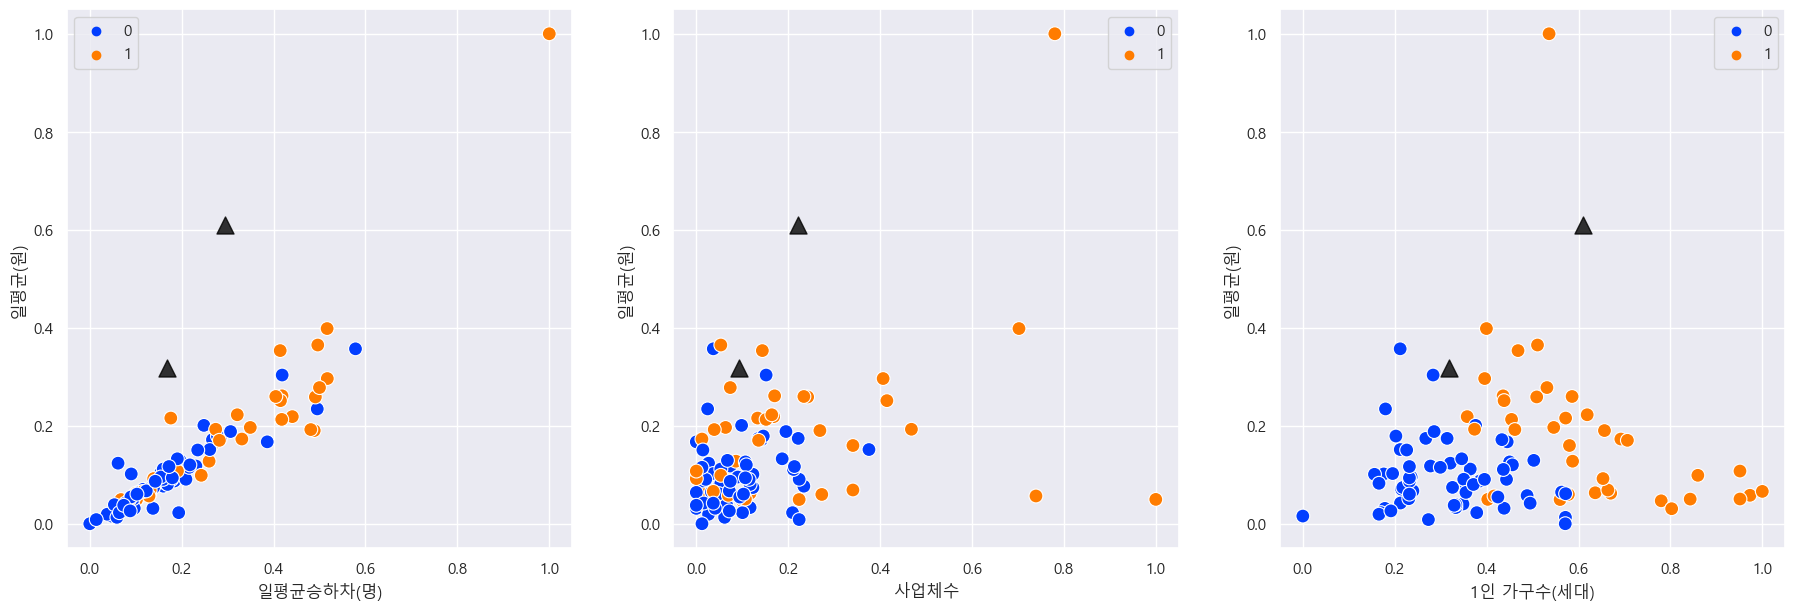

In [109]:
plt.figure(figsize=(30,7))
X= cluster_df
plt.subplot(141)    
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,3], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(142)    
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,3], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')

plt.subplot(143)  
sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,3], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')


plt.show()

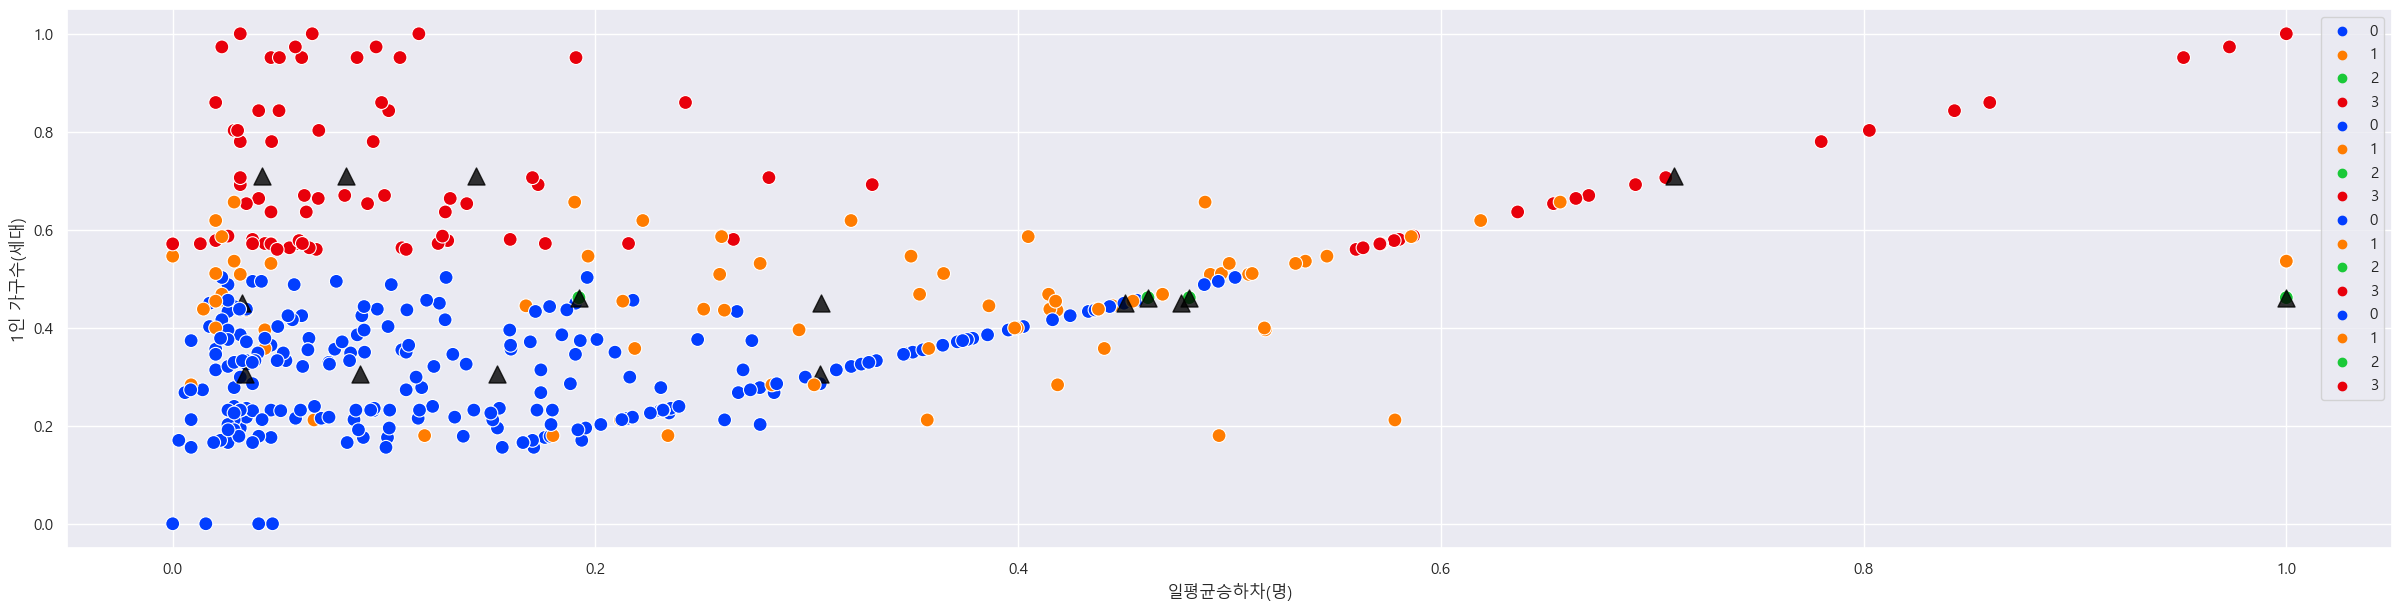

In [20]:
plt.figure(figsize=(30,7))
X= cluster_df

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,2], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')


sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,2], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')


sns.scatterplot(x=X.iloc[:,3], y=X.iloc[:,2], data=scaling_data, hue=cluster_model.labels_, palette='bright', s= 100) #
plt.scatter(centers[:,3], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.show()

In [20]:
cluster_df.to_csv('../data/클러스터링_minmax.csv',encoding='cp949')

In [19]:
cluster_df[cluster_df['clust']==3]

,일평균승하차(명),남여비율,1인 가구수(세대),일평균(원),clust
가야역,0.094868,0.031977,0.779942,0.046801,3
감전역,0.100226,0.081395,0.669979,0.062298,3
강서구청,0.067937,0.110465,0.559883,0.049423,3
괴정,0.259656,0.026163,0.587043,0.127642,3
노포,0.330967,0.031977,0.692104,0.172895,3
다대포항,0.102209,0.040698,0.843005,0.050309,3
다대포해수욕장,0.129001,0.046512,0.636328,0.063205,3
대연역,0.265292,0.037791,0.580286,0.159675,3
덕천역,0.176322,0.046512,0.571940,0.215681,3
덕포역,0.108473,0.055233,0.563196,0.064615,3


## k-medoid

In [36]:
# kmedoid elbow graph
def eblow_kmd(df, n):
    centroids = []
    for k in range(1, n):
        kdata = data
        kmd = pyclust.KMedoids(n_clusters=k)
        kmd.fit(df.values)
        centroids.append(kmd.centers_)
        kdata['cluster'] = kmd.labels_
        printExcel(kdata, k, False)
    k_euclid = [cdist(df.values, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(df.values)**2)/df.values.shape[0]
    bss = tss - wcss
    plt.plot(bss)
    plt.show()
    return bss

In [ ]:
import pyclus

In [ ]:
# k-medoid clustering
start_time = time.time()

kmd = pyclust.KMedoids(n_clusters=4, n_trials=50)
kmd.fit(ksample.values)

end_time = time.time()

# print processing time
print('처리시간 : ', end_time - start_time)